In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
df = spark.read.csv('./final_dataset.csv', header=True, sep=",")
df.show(15)

+---------+--------------------+---------+---------+--------------+--------------------+----------------+--------+---------+--------+
| movie_id|         movie_title|titleType|startYear|runtimeMinutes|              genres|   averageRating|numVotes|  name_id|category|
+---------+--------------------+---------+---------+--------------+--------------------+----------------+--------+---------+--------+
|tt0008177|   Küzdelem a Létért|    movie|     1918|            72|               Drama|6.19999980926514|      19|nm0223460|director|
|tt0008179|       The Last Suit|    short|     1915|            10|               Short|             5.5|      16|nm0523932|director|
|tt0008195|   The Little Pirate|    movie|     1917|            50|    Adventure Family|4.30000019073486|      25|nm0933368|director|
|tt0008196|   A Little Princess|    movie|     1917|            62|               Drama|6.09999990463257|     737|nm0624714|director|
|tt0008201|       The Lone Wolf|    movie|     1917|          

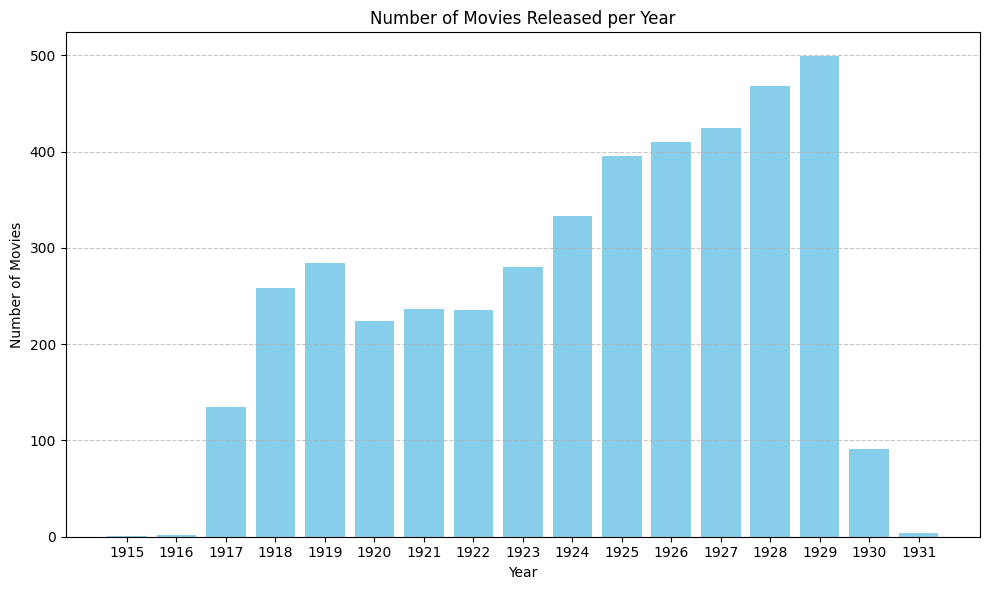

In [ ]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

movies_per_year = df.select("startyear").groupby("startyear").agg(count("*").alias("movie_count"))
movies_per_year_df = movies_per_year.toPandas()
movies_per_year_df = movies_per_year_df.sort_values(by="startyear")

# Ploting the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(movies_per_year_df["startyear"], movies_per_year_df["movie_count"], color='skyblue')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [ ]:
from pyspark.sql.functions import avg

runtime_by_type = (
    df.filter("runtimeMinutes IS NOT NULL")
    .groupBy("titleType")
    .agg(avg("runtimeMinutes").alias("avg_runtime"))
)
plot_data = runtime_by_type.collect()
title_types = [row["titleType"] for row in plot_data]
avg_runtimes = [row["avg_runtime"] for row in plot_data]

# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(title_types, avg_runtimes, color="skyblue")
plt.title("Average Runtime by Title Type")
plt.xlabel("Title Type")
plt.ylabel("Average Runtime (Min)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


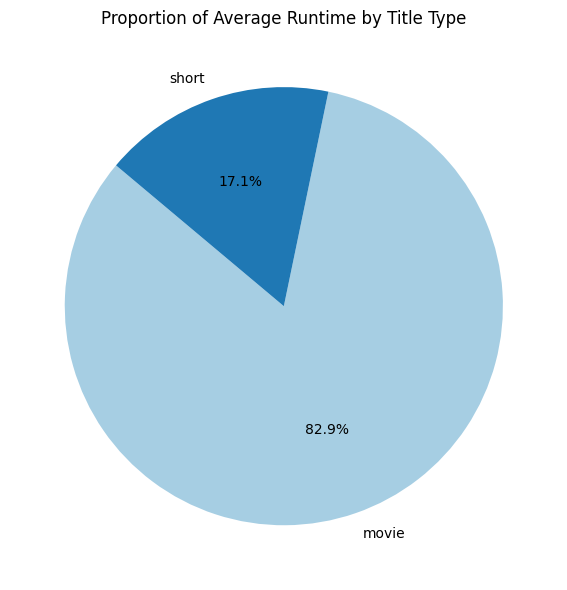

In [ ]:
from pyspark.sql.functions import avg
spark = SparkSession.builder.appName("TitleTypePieChart").getOrCreate()
runtime_by_type = (
    df.filter("runtimeMinutes IS NOT NULL")
    .groupBy("titleType")
    .agg(avg("runtimeMinutes").alias("avg_runtime"))
)
plot_data = runtime_by_type.collect()
title_types = [row["titleType"] for row in plot_data]
avg_runtimes = [row["avg_runtime"] for row in plot_data]
# Plot the pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(
    avg_runtimes,
    labels=title_types,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Proportion of Average Runtime by Title Type")
plt.tight_layout()
plt.show()